# Titanic: Machine Learning from Disaster

## Introduction

**Description:** The Titanic disaster was one of the biggest disaster in the ship travel history. From kaggle competition (https://www.kaggle.com/c/titanic) we have a lot of information about people in the ship deck. My aim will be forecast who will survive and who unfortunately not. This is a classification task so I use many of machine learning models to create the best one. I would like to find the answer of a question: Who could survive from this disaster ?

#### Libraries

In [2]:
import pandas as pd
import numpy as np
from numpy import char
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

#### Packages options

In [3]:
def pyplot_options(width, length):
    plt.figure(figsize = (width, length))

In [4]:
sns.set(style="ticks", color_codes=True)

In [5]:
warnings.filterwarnings('ignore')

#### Load datasets

In [332]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")
df_sub = pd.read_csv("../data/gender_submission.csv")

## Exploratory Data Analysis (EDA)

EDA methodology is one of the most important thing during creating machine learning models. If we don't know the data we can't create accurate model. Usually during this step we find out that in some reason one of the feature or only part of some feature is more important than another. For example, in titanic disaster we can think that sex variable will be very important in our model because we know (from the internet, movie) that women had the priority to enter the lifeboat - in effect, if particular person was female then had higher probability that survive in contrast to male person.

#### Datasets head

In [7]:
df_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [8]:
df_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [9]:
df_sub.head(1)

,PassengerId,Survived
0,892,0


We have 10 columns - without Survived target and PassengerId - index column. Let's check what are the types of them.

In [10]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Half of my features are numeric - Pclass, Age, SibSp, Parch, Fare. In my opinion Pclass, SibSp and Parch aren't numerical features - it will be better for model to convert it to categorical variables. The best for me is to create function for those calculation, because I wil have to repeat that things later on testing dataset. I will do it on _Feature Engineering_ step.

#### Datasets dimension

In [11]:
print("Shape of train dataset: ", df_train.shape)
print("Shape of test dataset: ", df_test.shape)
print("Shape of sub dataset: ", df_sub.shape)

Shape of train dataset:  (891, 12)
Shape of test dataset:  (418, 11)
Shape of sub dataset:  (418, 2)


#### Quick introduce to the dataset

Nice way to quick introduce to the data is to create pairplot. This is the plots where you can see many of the relationships in your dataset in contrast to your target variable - in our case is of course survived variable.

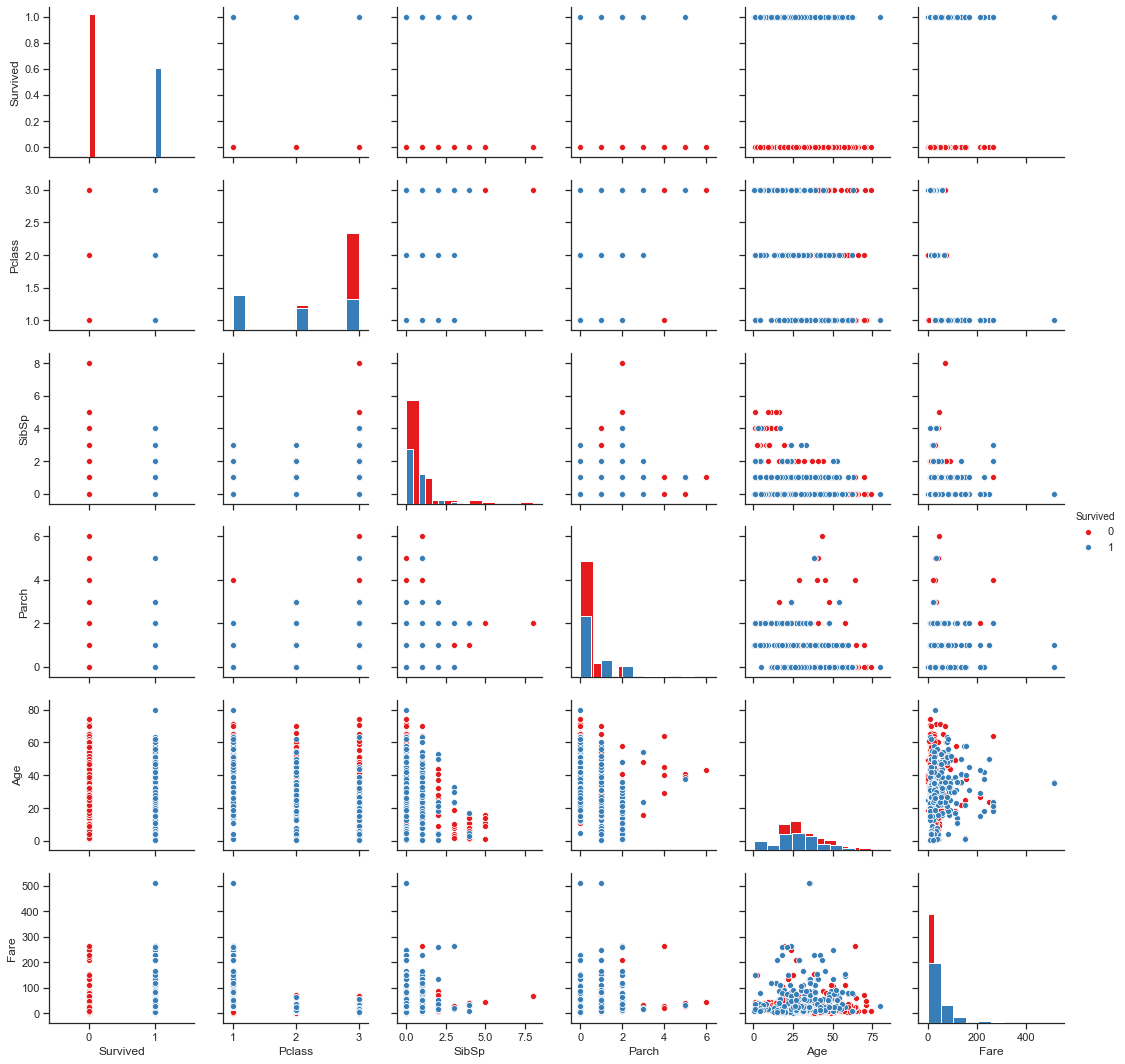

In [12]:
pair_plot_features = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare']
g = sns.pairplot(data=df_train.loc[:, pair_plot_features], hue='Survived', palette="Set1", diag_kind = 'hist')

Quick conclusions:
    1. People who pay for ticket not much money (may be they were from crew and pay 0) died more often than 
    rest of passengers
    2. People from lowest class died more often that people from highest class,
    3. People who pay not much money for ticket and were older have higher probability of died,
    4. Alone people (without any of parents or children on ship) died rarely than rest

Of course its only a few conclusions from this pair plot. May be they aren't good and will be not helpful but right now they are interesting for me and compatible with intuition.

#### Target: Survived

Below I create countplot to show that unfortunately in Titanic disaster died more people than survived. We see that both of dataset have the same balanced class. Its not 50/50 but about 62.5%/37.5% in not survived to survivied people but I think that model should deal with that balanced group.

Text(0.5, 1.0, 'Number of survivors of the Titanic disaster')

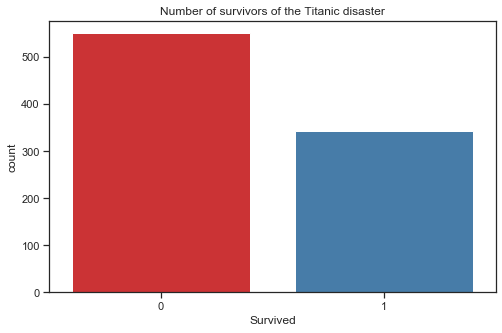

In [13]:
pyplot_options(8, 5)
sns.countplot(x="Survived", data = df_train, palette="Set1")
plt.title("Number of survivors of the Titanic disaster")

#### Feature: Sex

Everything I will be doing on new dataset - df_train_new. The reason is only one. Here I would like to create new features, analyze them and understand my data. During that things I create new functions which will influence on df_train dataset. This functions I will test on df_train_new. After that part of analysis I will create the classification model and then split df_train into train and test set. Then I will use my function on train dataset and create the model. Then I will use this function on test dataset and chceck the performence of model.

In [54]:
df_train_new = df_train.copy()
#df_train_new['Sex'] = df_train_new.Sex.map({'male':1, 'female':0})
df_train_new['Sex'] = df_train_new['Sex'].astype('category')

Text(0.5, 1.0, 'Number of men and women on board the Titanic')

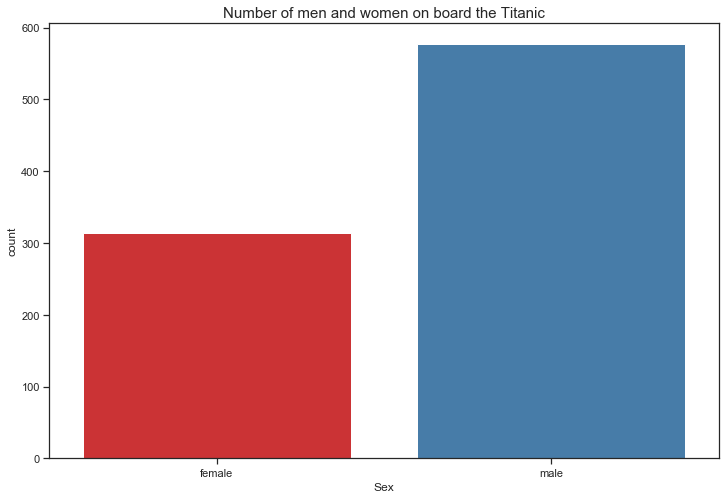

In [15]:
pyplot_options(12, 8)
sns.countplot(data=df_train_new, x='Sex', palette="Set1")
plt.title("Number of men and women on board the Titanic", fontsize=15)

Text(0.5, 1.0, 'Number of Male and Female people survived from disaster')

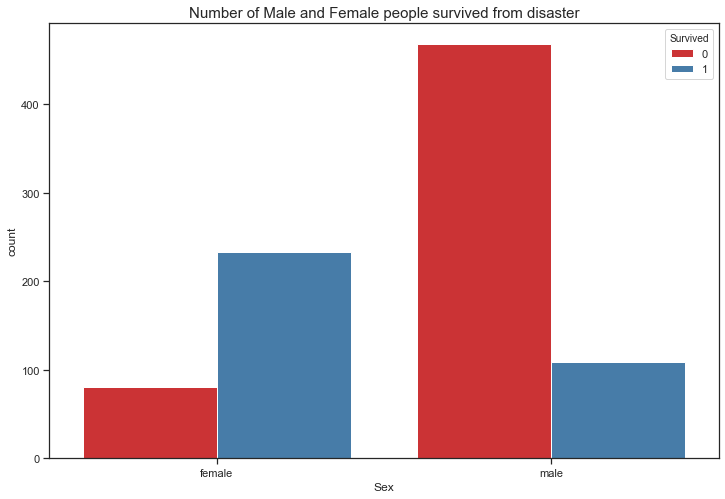

In [16]:
pyplot_options(12, 8)
sns.countplot(data=df_train_new, x='Sex', hue = "Survived", palette="Set1")
plt.title("Number of Male and Female people survived from disaster", fontsize=15)

In [17]:
df_train.Sex.isnull().value_counts()

False    891
Name: Sex, dtype: int64

**Conclusion:** Like I wrote before - women have higher probability of survieved than men.

#### Feature: Age

In [18]:
age_cut=pd.cut(df_train_new.Age, bins = [0, 6, 14, 20, 30, 45, 60, 100])
d = {"CutAge":age_cut, "Sex": df_train_new.Sex, "Survived": df_train_new.Survived}
age_df = pd.DataFrame(data=d)
print("Age dataset shape:", age_df.shape)

Age dataset shape: (891, 3)


Text(0.5, 1.0, 'Number of survivors in contrast to Age variable')

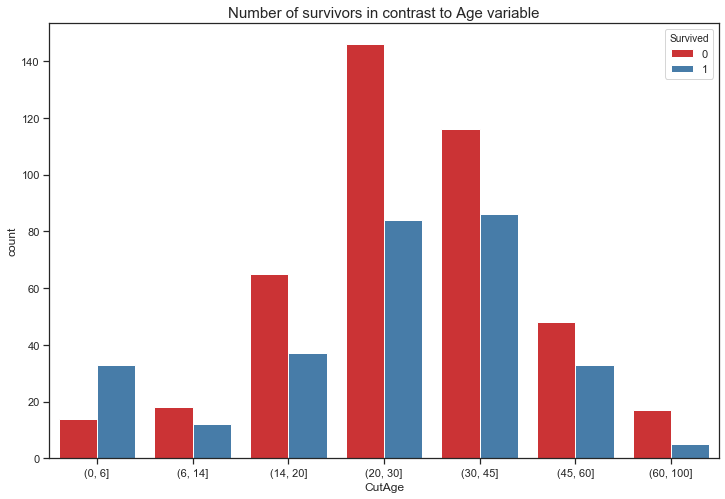

In [19]:
pyplot_options(12, 8)
sns.countplot(data=age_df, x = "CutAge", hue = "Survived", palette="Set1")
plt.title("Number of survivors in contrast to Age variable", fontsize = 15)

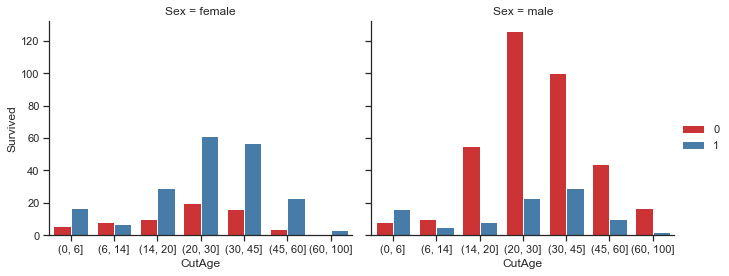

In [20]:
def countplot(x, hue, **kwargs):
    sns.countplot(x=x, hue=hue, **kwargs, palette="Set1")
    
grid = sns.FacetGrid(age_df, col="Sex", size=4, aspect=1.2)
fig = grid.map(countplot, "CutAge", "Survived")
fig.add_legend()

**Conclusion:** Age feature should have a big influence to accuracy of our model. We see that for examlpe on medium age like 14-30 survived people have similar balance like all of people about 27.5%/62.5% (like I write at the beginning). Difference behaviour we see for age 0-6 where we see that kids in that age have highest probability of survived about 70%/30%. Different proportion have also ages 60-100 where that people have lowest probability of survived about 20%/80%.  

In [21]:
age_null_values = 100*(df_train_new[df_train_new.Age.isnull() == True].shape[0]/df_train_new.shape[0])
print("Almost {}% of people have Age NaN values".format(np.round(age_null_values, 2)))

Almost 19.87% of people have Age NaN values


**Conclusion:** I think that this is a quite big number of people who don't have value of age. During feature engineering step I will try to impute NaN values of one the cut interval.

#### Feature: Pclass

Text(0.5, 1.0, 'Countplot of Passanger Class in contrast to Survived')

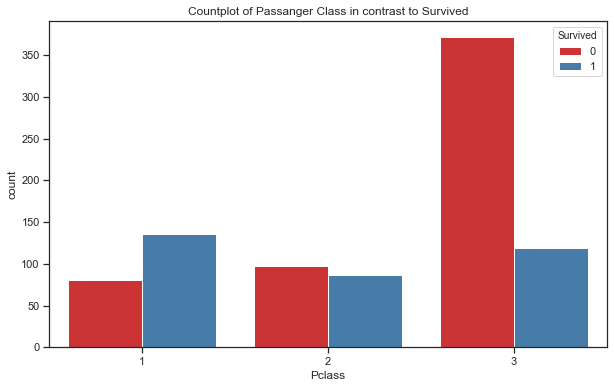

In [22]:
pyplot_options(10, 6)
sns.countplot(x = df_train.loc[:, 'Pclass'], hue = df_train.loc[:, 'Survived'], palette="Set1")
plt.title("Countplot of Passanger Class in contrast to Survived")

**Conclusion:** Class nr 3 has huge impact to Survived target. Class nr 1 has some impact but in difference way than nr 3 - in class nr 1 Survived more than half people. 

In [23]:
pclass_null_values = 100*(df_train_new[df_train_new.Pclass.isnull() == True].shape[0]/df_train_new.shape[0])
print("Almost {}% of people have Pclass NaN values".format(np.round(pclass_null_values, 2)))

Almost 0.0% of people have Pclass NaN values


#### Feature: SibSp

Text(0.5, 1.0, 'Number of sibilings aboard to Titanic in contrast to Survived')

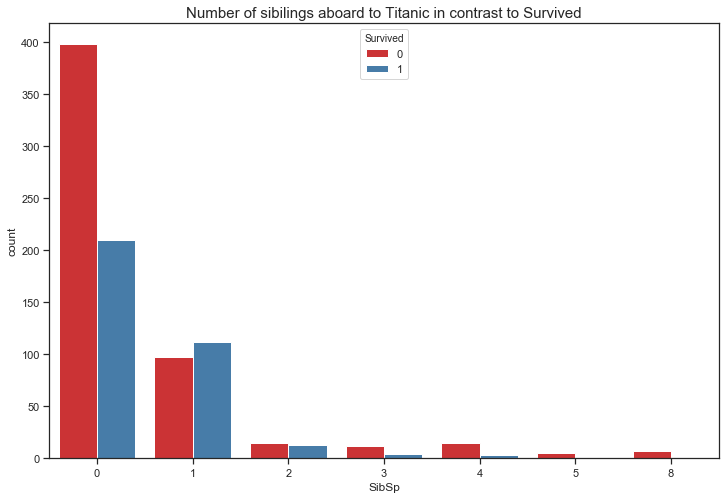

In [24]:
pyplot_options(12, 8)
sns.countplot(data = df_train_new, x='SibSp', hue ='Survived', palette="Set1")
plt.title("Number of sibilings aboard to Titanic in contrast to Survived", fontsize=15)

In [29]:
def sibsp_function(feature):
    if feature == 0:
        return '0'
    elif feature == 1 or feature == 2: 
        return '1-2' 
    else: 
        return '>2'

df_train_new['SibSp_0'] = df_train_new.apply(lambda df: sibsp_function(df['SibSp']), axis=1)

Text(0.5, 1.0, 'Number of sibilings aboard to Titanic in contrast to Survived')

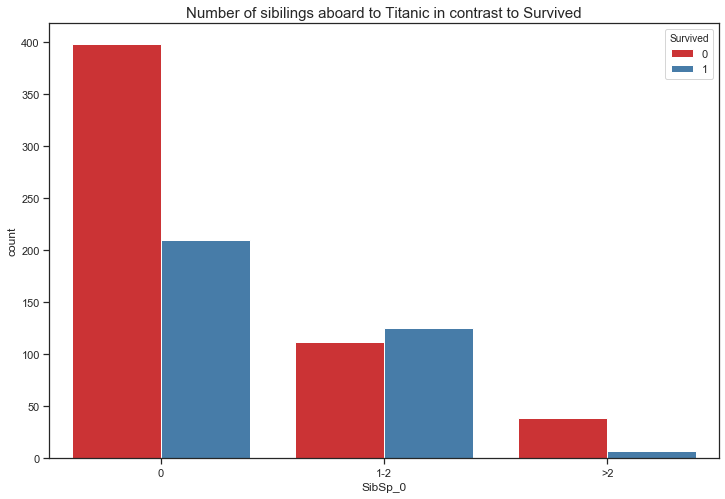

In [30]:
pyplot_options(12, 8)
sns.countplot(data = df_train_new, x='SibSp_0', hue ='Survived', palette="Set1", order=['0', '1-2', '>2'])
plt.title("Number of sibilings aboard to Titanic in contrast to Survived", fontsize=15)

In [31]:
sib_null_values = 100*(df_train_new[df_train_new.SibSp.isnull() == True].shape[0]/df_train_new.shape[0])
print("Almost {}% of people have SibSp NaN values".format(np.round(sib_null_values, 2)))

Almost 0.0% of people have SibSp NaN values


**Conclusion:** When people didn't have sibilings then probability of survived decreased. 

#### Feature: Parch

Text(0.5, 1.0, 'Number of Parents or Children aboard to Titanic in contrast to Survived')

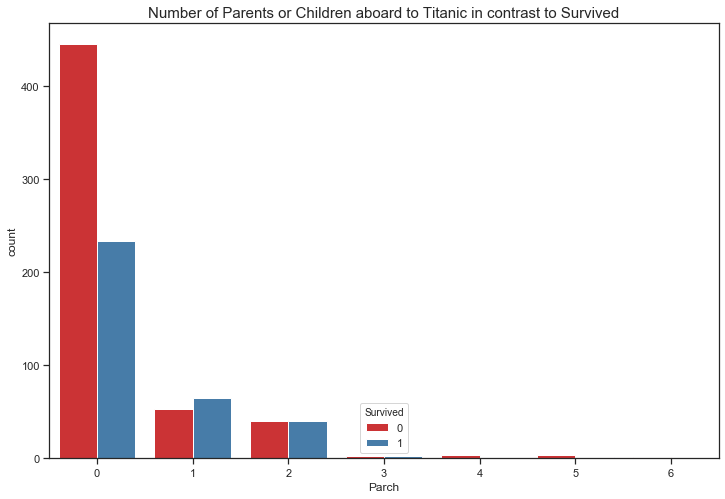

In [32]:
pyplot_options(12, 8)
sns.countplot(data=df_train_new, x = 'Parch', hue = 'Survived', palette="Set1")
plt.title("Number of Parents or Children aboard to Titanic in contrast to Survived", fontsize=15)

In [33]:
def parch_function(feature):
    if feature == 0:
        return '0'
    else:
        return '>= 1'

df_train_new['Parch_0'] = df_train_new.apply(lambda df: parch_function(df['Parch']), axis=1)

Text(0.5, 1.0, 'Number of Parents or Children aboard to Titanic in contrast to Survived')

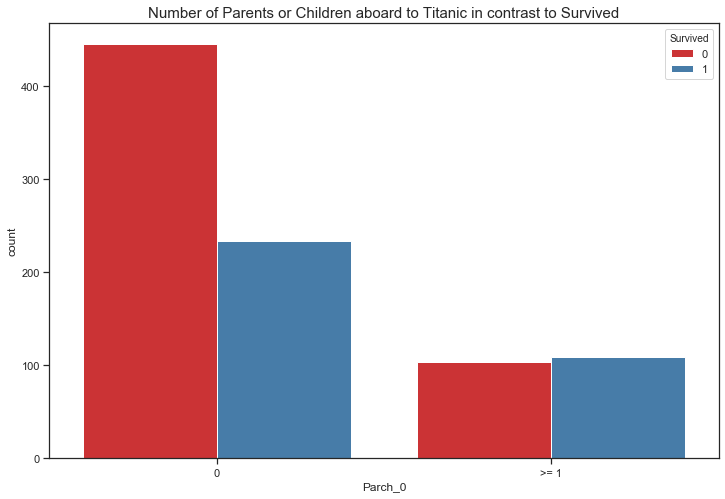

In [34]:
pyplot_options(12, 8)
sns.countplot(data=df_train_new, x = 'Parch_0', hue = 'Survived', palette="Set1")
plt.title("Number of Parents or Children aboard to Titanic in contrast to Survived", fontsize=15)

**Conclusion:** Parch variable equal to 3, 4, 5 or 6 don't have any influence into the dataset. We see that when passenger didn't have any child or parent survived rarely than passenger who had any close person.

#### Feature: Ticket

In [35]:
ticket_counts = df_train_new.Ticket.value_counts()
ticket_counts = pd.DataFrame({'Ticket':ticket_counts.index, 'PassengerTicket':ticket_counts}).reset_index().drop(['index'],axis=1)

In [36]:
df_train_new = pd.merge(df_train_new, ticket_counts, left_on='Ticket', right_on = 'Ticket', how='left')
df_train_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_0,Parch_0,PassengerTicket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1-2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1-2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1-2,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


Text(0.5, 1.0, 'Number of people on one ticket in contrast to survivors')

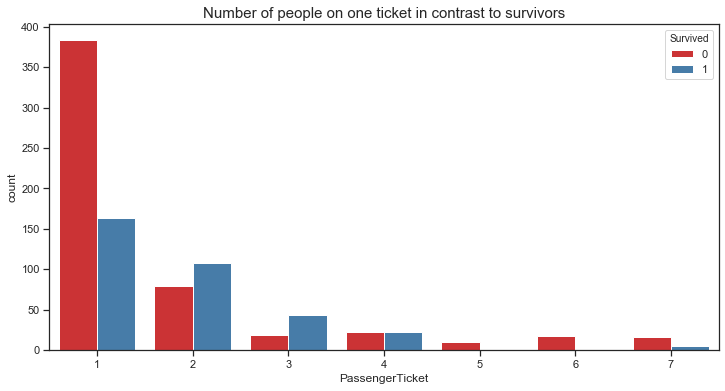

In [38]:
pyplot_options(12, 6)
sns.countplot(data=df_train_new, x="PassengerTicket", hue="Survived", palette="Set1")
plt.title("Number of people on one ticket in contrast to survivors", fontsize=15)

Text(0.5, 1.0, 'Number of people on one ticket (only one person) in contrast to survivors')

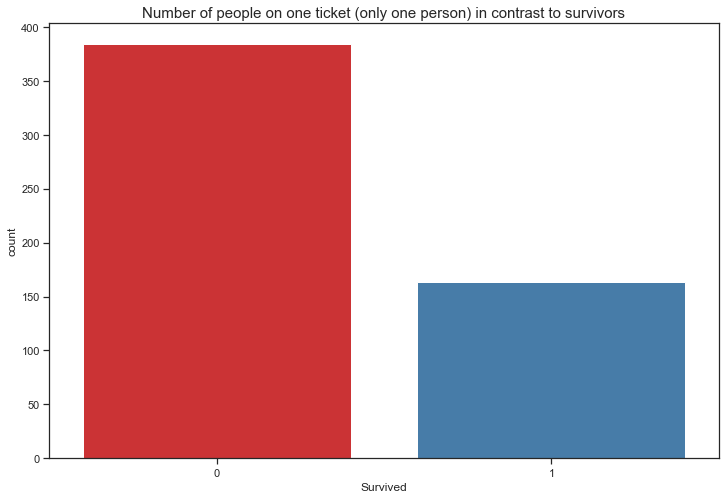

In [40]:
pyplot_options(12, 8)
sns.countplot(data=df_train_new[df_train_new.PassengerTicket == 1], x="Survived", palette="Set1")
plt.title("Number of people on one ticket (only one person) in contrast to survivors", fontsize=15)

Text(0.5, 1.0, 'Number of people on one ticket (greater than 2) in contrast to survivors')

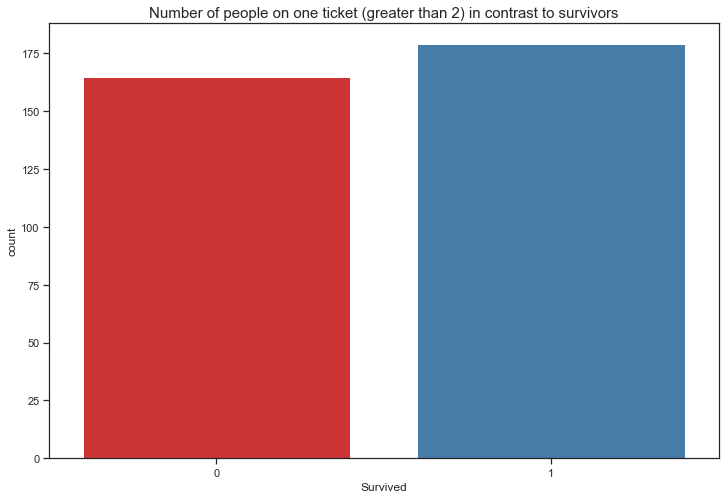

In [39]:
pyplot_options(12, 8)
sns.countplot(data=df_train_new[df_train_new.PassengerTicket >= 2 ], x="Survived", palette="Set1")
plt.title("Number of people on one ticket (greater than 2) in contrast to survivors", fontsize=15)

**Conclusion:** People who traveled with somebody (in the same ticket) had more chance to survived than people who traveled alone.

#### Feature: Fare

Text(0.5, 1.0, 'Boxplot of Fare in contrast to Survived')

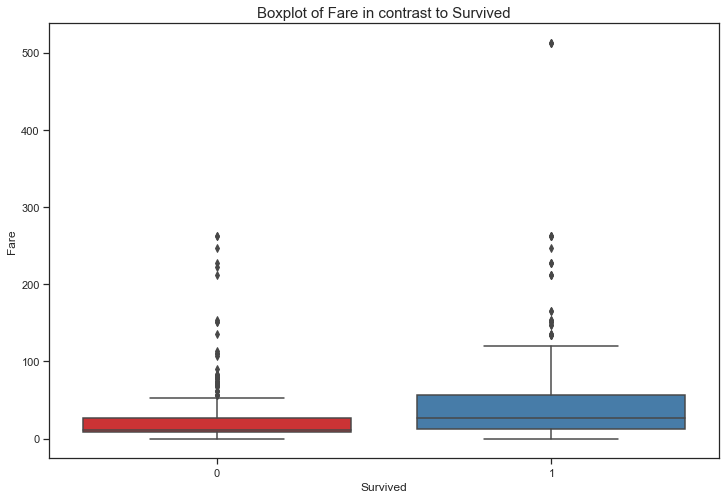

In [41]:
pyplot_options(12, 8)
sns.boxplot(data=df_train_new, x = "Survived", y="Fare", orient="v", palette="Set1")
plt.title("Boxplot of Fare in contrast to Survived", fontsize=15)

Text(0.5, 1.0, 'Countplot interval of Fare in contrast to Survived')

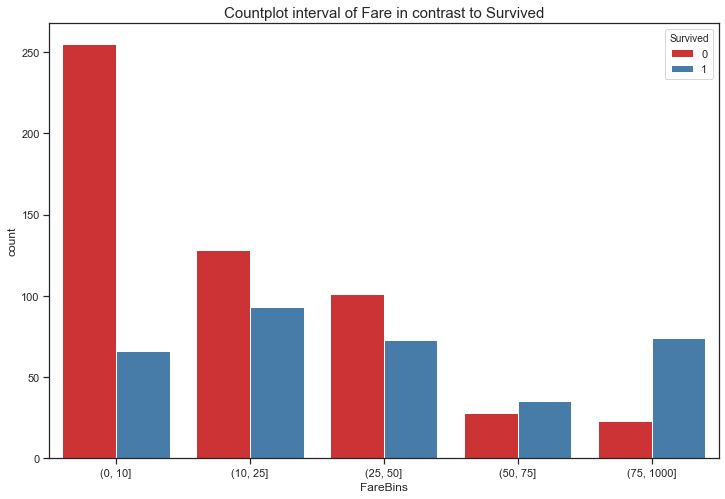

In [42]:
df_train_new['FareBins'] = pd.cut(df_train_new.Fare, bins=[0, 10, 25, 50, 75, 1000])
pyplot_options(12, 8)
sns.countplot(data=df_train_new, x = "FareBins", hue="Survived", palette="Set1")
plt.title("Countplot interval of Fare in contrast to Survived", fontsize=15)

**Conclusion:** Value of fare had big influence of Surivived during Titanic disaster.

#### Feature: Cabin

In [43]:
cabin_counts = df_train_new.Cabin.value_counts()
cabin_counts = pd.DataFrame({'Cabin':cabin_counts.index, 'PassengerCabin':cabin_counts}).reset_index().drop(['index'],axis=1)

In [44]:
df_train_new2 = pd.merge(df_train_new.copy(), cabin_counts, left_on='Cabin', right_on = 'Cabin', how='left')
df_train_new2.PassengerCabin[df_train_new2.PassengerCabin.isna() == True] = 0
df_train_new2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_0,Parch_0,PassengerTicket,FareBins,PassengerCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1-2,0,1,"(0, 10]",0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1-2,0,1,"(50, 75]",1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,"(0, 10]",0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1-2,0,2,"(50, 75]",2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,"(0, 10]",0.0


Text(0.5, 1.0, 'Number of Passengers who have cabin in contrast to Survived')

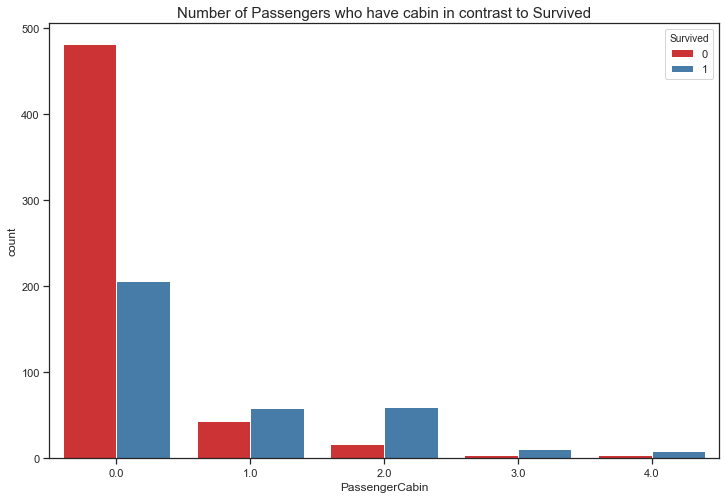

In [45]:
pyplot_options(12, 8)
sns.countplot(data=df_train_new2, x="PassengerCabin", hue="Survived", palette="Set1")
plt.title("Number of Passengers who have cabin in contrast to Survived", fontsize=15)

**Conclusion:** People who didn't have cabin died more often than people who had. 

#### Feature: Embarked

Text(0.5, 1.0, 'Place of Embarked in contrast to Survived')

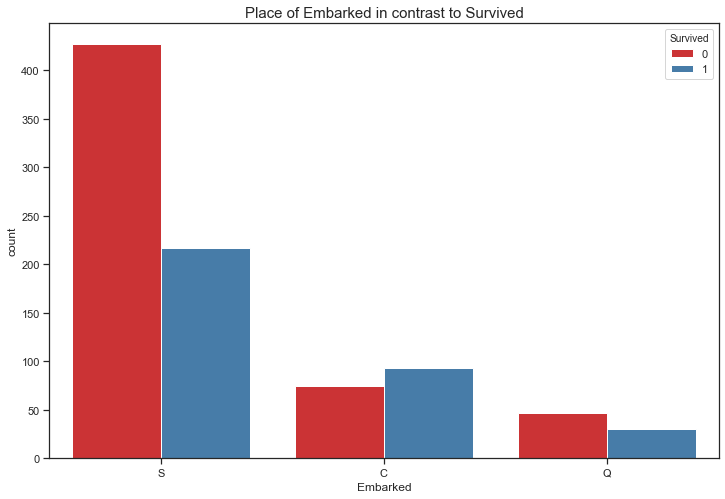

In [46]:
pyplot_options(12, 8)
sns.countplot(data=df_train_new, x = "Embarked", hue="Survived", palette="Set1")
plt.title("Place of Embarked in contrast to Survived", fontsize=15)

#### Feature: Name

Now let's see on Name feature. We see that there are some names, surnames but also titles like Miss, Mr or Master. May be it will be important for our model. Of course titles like Mr. or Miss. are in Sex variable but Master is something else. Let's try to find there some pattern !!

In [38]:
df_train_new.Name.value_counts()

Becker, Master. Richard F            1
Andrews, Miss. Kornelia Theodosia    1
Moraweck, Dr. Ernest                 1
Lesurer, Mr. Gustave J               1
Walker, Mr. William Anderson         1
                                    ..
Canavan, Miss. Mary                  1
Harper, Mr. Henry Sleeper            1
Windelov, Mr. Einar                  1
Johnson, Mr. Malkolm Joackim         1
Fahlstrom, Mr. Arne Jonas            1
Name: Name, Length: 891, dtype: int64

Now let's see on Name feature. We see that there are some names, surnames but also titles like Miss, Mr or Master. May be it will be important for our model. Of course titles like Mr. or Miss. are in Sex variable but Master is something else. Let's try to find there some pattern !!

In [53]:
df_train_new.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'SibSp_0', 'Parch_0', 'PassengerTicket',
       'FareBins'],
      dtype='object')

In [55]:
df_train_new.set_index('PassengerId', inplace=True)

In [56]:
df_name = df_train_new.Name.str.split(",", expand=True).rename(columns = lambda x: f"Part_Name_{x+1}")
df_name_2 = df_name.Part_Name_2.str.split(".", expand=True).rename(columns = lambda x: f"Part_Name_{x+1}")
df_name.rename(columns={"Part_Name_1":"Surname", "Part_Name_2":"Title_Name"}, inplace=True)
df_name_2.rename(columns = {"Part_Name_1":"Title", "Part_Name_2":"Surname", "Part_Name_3":"Rest"}, inplace=True)

In [57]:
df_name.head(1)

,Surname,Title_Name
PassengerId,,
1,Braund,Mr. Owen Harris


In [58]:
df_name_2.head(1)

,Title,Surname,Rest
PassengerId,,,
1,Mr,Owen Harris,None


In [59]:
df_name_2.Title.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

We see that all of this title have whitespaces. Let's remove them.

In [60]:
df_name_2['Title'] = df_name_2.Title.str.strip()
df_name_2['Surname'] = df_name_2.Surname.str.strip()
df_name_2['Rest'] = df_name_2.Rest.str.strip()

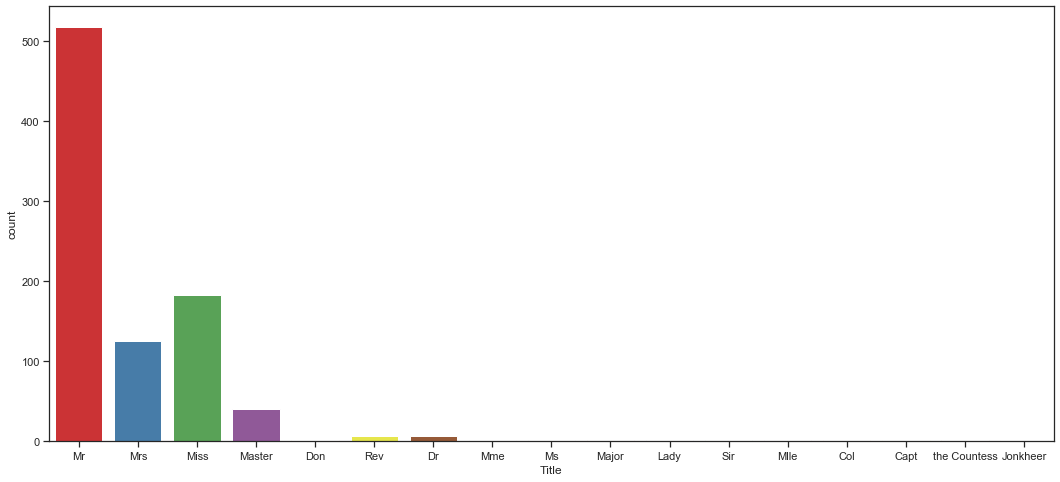

In [62]:
pyplot_options(18, 8)
sns.countplot(data=df_name_2, x = "Title", palette="Set1")

**Idea:** This feature will be helpful during Imputation process. My dataset have a lot of missing data in Age feature. With title variable I will calculate mean of age feature in all of titles and then I will impute NA values by that average.

We see that on the ship were some people with title different from Mr or Miss. In my opinion titles like: Mr, Miss, Mrs, Master, Ms we can drop. Rest of them may be important in my model. Let's check it in some visualization. 

In [63]:
normal_titles = ('Mr', 'Miss', 'Mrs', 'Master', 'Ms')
unusual_titles = ('Dr', 'Rev', 'Mlle', 'Col', 'Capt', 'the Countess', 'Mme', 'Lady')

In [64]:
df_plot = pd.merge(df_name_2, pd.DataFrame(df_train_new), how='inner', left_on='PassengerId', right_on='PassengerId') 
df_plot['NormalTitle'] = df_plot.Title.isin(normal_titles).astype(int)

In [65]:
df_plot.head(1)

,Title,Surname,Rest,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NormalTitle
PassengerId,,,,,,,,,,,,,,,
1,Mr,Owen Harris,None,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1


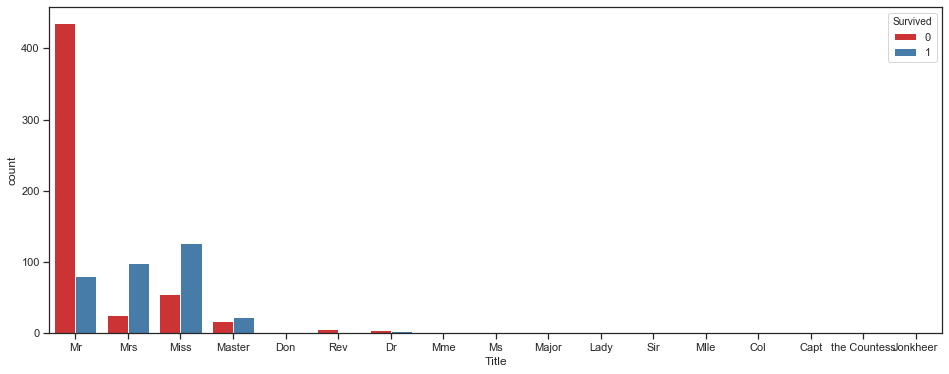

In [67]:
pyplot_options(16, 6)
sns.countplot(x='Title', hue = 'Survived', palette="Set1", data = df_plot)

In [68]:
df_plot['Youth'] = df_plot.Title.isin(['Miss', 'Master']).astype(int)

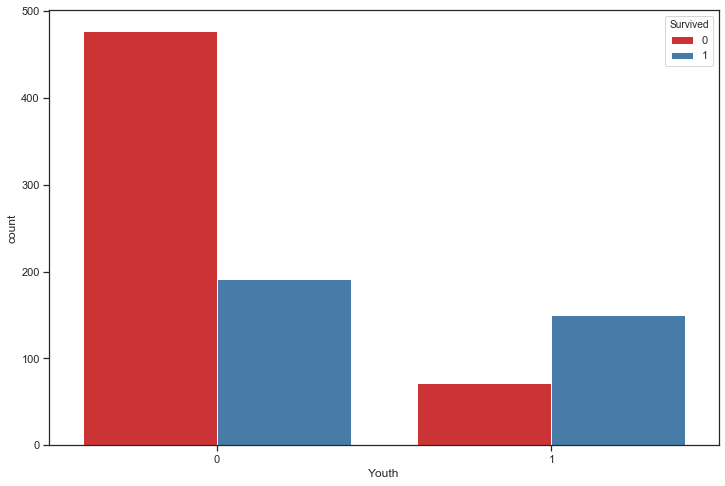

In [69]:
pyplot_options(12, 8)
sns.countplot(x='Youth', hue ='Survived', palette="Set1", data=df_plot)

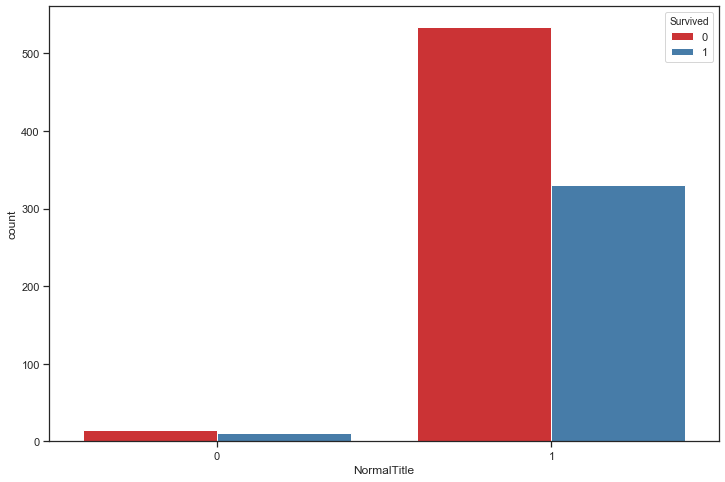

In [70]:
pyplot_options(12, 8)
sns.countplot(x='NormalTitle', hue ='Survived', palette='Set1', data=df_plot)

Summarizing column Name could be helpful during _Feature Imputation_ and may be in final model. I think that the best feature which i can pull from it is feature _Youth_ like I show above. Rest of column isn't so important - in my opinion of course. In _Feature Engineering_ step I will create function with all of operation which I've done above.

Moreover I create function for imputation Nan values form Age feature. Replacing Nan values by average of Mr, Mrs or Youth title will be ea good idea. More accurate than application of most frequent metric.

In [26]:
df_plot.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [36]:
age_youth = np.round(df_plot[df_plot.Youth == 1]['Age'].mean())
age_adult = np.round(df_plot[df_plot.Youth == 0]['Age'].mean())
age_mr = np.round(df_plot[df_plot.Title == 'Mr']['Age'].mean())
age_mrs = np.round(df_plot[df_plot.Title == 'Mrs']['Age'].mean())

print("Youth Age:", age_youth)
print("Adult Age:", age_adult)
print("Mr Age:", age_mr)
print("Mrs Age:", age_mrs)

Youth Age: 18.0
Adult Age: 34.0
Mr Age: 32.0
Mrs Age: 36.0


## Feature Engineering

#### Set index: PassengerId

In [84]:
def set_index_data(data):
    data.set_index('PassengerId', inplace=True)
    return print("Complete")

#### Convert features

In [85]:
def convert_features(data):
    df = data.copy()
    df['Pclass'] = df['Pclass'].astype('category') 
    df['SibSp'] = df['SibSp'].astype('category')
    df['Parch'] = df['Parch'].astype('category')
    df['Sex'] = df['Sex'].map({'male':1, 'female':0}).astype('category')
    df['Embarked'] = df['Embarked'].astype('category')
    df['Fare'] = df['Fare'].round(2)
    return df

#### Feature: Age

In [86]:
def feature_engineering_agebins(data, bins=[0, 6, 20, 30, 45, 60, 100], inplace=False):
    data['AgeBins']=pd.cut(data.Age, bins=bins, right=False, labels=bins[:-1])
    print("Complete")
    return data

In [87]:
def imputation_age(df):
    age_youth = np.round(df[df.Youth == 1]['Age'].mean())
    age_mr = np.round(df[df.Title == 'Mr']['Age'].mean())
    age_mrs = np.round(df[df.Title == 'Mrs']['Age'].mean())
    age_adult = np.round(df[df.Youth == 0]['Age'].mean())
    
    df.loc[(df.Youth == 1) & (df.Age.isnull()), 'Age']  = age_youth
    df.loc[(df.Title == 'Mr') & (df.Age.isnull()), 'Age']  = age_mr
    df.loc[(df.Title == 'Mrs') & (df.Age.isnull()), 'Age']  = age_mrs
    df.loc[(df.Youth == 0) & (df.Age.isnull()), 'Age']  = age_adult
    return df

#### Feature: Ticket

In [88]:
def feature_passenger_ticket(data):
    ticket_counts = data.Ticket.value_counts()
    ticket_counts = pd.DataFrame({'Ticket':ticket_counts.index, 
                                  'PassengerTicket':ticket_counts}).reset_index().drop(['index'],axis=1) 
    data = pd.merge(data, ticket_counts, left_on='Ticket', right_on = 'Ticket', how='left')
    data['PassengerTicketGT2'] = 0
    data['PassengerTicketGT2'][data.PassengerTicket >= 2] = 1
    print("Complete")
    return data

#### Feature: Cabin

In [89]:
def feature_passenger_cabin(data):
    cabin_counts = data.Cabin.value_counts()
    cabin_counts = pd.DataFrame({'Cabin':cabin_counts.index, 
                                 'PassengerCabin':cabin_counts})\
    .reset_index()\
    .drop(['index'],axis=1)
    data = pd.merge(data, cabin_counts, left_on='Cabin', right_on = 'Cabin', how='left')
    data.PassengerCabin[data.PassengerCabin.isna() == True] = 0
    data['PassengerCabinGT2'] = 0
    data['PassengerCabinGT2'][data.PassengerCabin >= 2] = 1
    print("Complete")
    return data

In [90]:
def feature_engineering_newcabin(data):
    data['NewCabin']=char.ljust(np.array(data.Cabin.replace(np.nan, 'X')).astype(str), width=0)
    print("Complete")
    return data

#### Feature: Fare

In [91]:
def feature_engineering_farebins(data, bins=[0, 10, 25, 50, 75, 1000]):
    data['FareBins']=pd.cut(data.Fare, bins=bins, right=False, labels=bins[:-1])
    print('Complete')
    return data

#### Feature: SibSp

In [92]:
def feature_engineering_sibsp(data):
    def sibsp_function(feature):
        if feature == 0:
            return '0'
        elif feature == 1 or feature == 2: 
            return '1-2' 
        else: 
            return '>2'
        
    data['SibSp_0'] = data.apply(lambda df: sibsp_function(df['SibSp']), axis=1)
    return data

#### Feature: Parch

In [93]:
def feature_engineering_parch(data):
    def parch_function(feature):
        if feature == 0:
            return 0
        else:
            return 1

    data['NewParch'] = data.apply(lambda df: parch_function(df['Parch']), axis=1)
    return data

#### Feature: Name

In [94]:
def feature_engineering_name(data):
    
    # Copy input dataset
    df = data.copy()
    
    # Split Name feature into several columns
    df_name = df.Name.str.split(",", expand=True).rename(columns = lambda x: f"Part_Name_{x+1}")
    df_name_2 = df_name.Part_Name_2.str.split(".", expand=True).rename(columns = lambda x: f"Part_Name_{x+1}")
    
    # Rename new features and remove whitespaces
    df_name_2.rename(columns = {"Part_Name_1":"Title"}, inplace=True)
    df_name_2['Title'] = df_name_2.Title.str.strip()
    
    # Create vector with normal titles
    normal_titles = ('Mr', 'Miss', 'Mrs', 'Master', 'Ms')
    
    # Create new variables 
    df_name_2['NormalTitle'] = df_name_2.Title.isin(normal_titles).astype(int)
    df_name_2['Youth'] = df_name_2['Title'].isin(['Miss', 'Master']).astype(int)
    df_name_2 = df_name_2.loc[:, ('Title', 'NormalTitle', 'Youth')]
    
    df = pd.merge(df, df_name_2, how="inner", on="PassengerId")
    return df

## Modelling

First one I will split df_train for training and testing datasets. On training dataset I will create new features and build the model and on testing dataset I will use the same functions to create features like on training dataset and check the performence of the model. 

Before split I use PassengerId like index variable. In my opinion PassengerId isn't necessary feature to increase performence the model - it's great feature for index my data.

### Load dataset

In [124]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")
df_sub = pd.read_csv("../data/gender_submission.csv")

### Train, test split

In [125]:
from sklearn.model_selection import train_test_split

```
X_train = df_train.drop(['Survived'], axis=1)
y_train = df_train.loc[:, 'Survived']
X_test = df_test.copy()
y_test = df_sub.loc[:, 'Survived']
```

In [126]:
X = df_train.copy().drop(['Survived'], axis=1)
y = df_train['Survived']

In [127]:
np.random.seed(23)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [128]:
print('Shape of training features: ', X_train.shape)
print('Shape of testing features: ', X_test.shape)
print('Shape of training target: ', y_train.shape)
print('Shape of testing target: ', y_test.shape)

Shape of training features:  (623, 11)
Shape of testing features:  (268, 11)
Shape of training target:  (623,)
Shape of testing target:  (268,)


### Feature Engineering

In [129]:
set_index_data(X_train)
set_index_data(X_test)
set_index_data(df_test)
set_index_data(df_train)

Complete
Complete
Complete
Complete


In [130]:
X_train=convert_features(X_train)
X_test=convert_features(X_test)
df_test = convert_features(df_test)
df_train = convert_features(df_train)

In [131]:
X_train=feature_engineering_name(X_train)
X_test=feature_engineering_name(X_test)
df_test=feature_engineering_name(df_test)
df_train=feature_engineering_name(df_train)

In [132]:
X_train = imputation_age(X_train)
X_test = imputation_age(X_test)
df_train = imputation_age(df_train)
df_test = imputation_age(df_test)

In [133]:
X_train=feature_engineering_agebins(X_train, inplace=False)
X_test=feature_engineering_agebins(X_test, inplace=False)
df_test=feature_engineering_agebins(df_test, inplace=False)
df_train=feature_engineering_agebins(df_train, inplace=False)

Complete
Complete
Complete
Complete


In [134]:
X_train=feature_passenger_ticket(X_train)
X_test=feature_passenger_ticket(X_test)
df_test=feature_passenger_ticket(df_test)
df_train=feature_passenger_ticket(df_train)

Complete
Complete
Complete
Complete


In [135]:
X_train=feature_passenger_cabin(X_train)
X_test=feature_passenger_cabin(X_test)
df_test=feature_passenger_cabin(df_test)
df_train=feature_passenger_cabin(df_train)

Complete
Complete
Complete
Complete


In [136]:
X_train=feature_engineering_newcabin(X_train)
X_test=feature_engineering_newcabin(X_test)
df_test=feature_engineering_newcabin(df_test)
df_train=feature_engineering_newcabin(df_train)

Complete
Complete
Complete
Complete


In [137]:
X_train=feature_engineering_farebins(X_train)
X_test=feature_engineering_farebins(X_test)
df_test=feature_engineering_farebins(df_test)
df_train=feature_engineering_farebins(df_train)

Complete
Complete
Complete
Complete


In [138]:
X_train=feature_engineering_sibsp(X_train)
X_test=feature_engineering_sibsp(X_test)
df_test=feature_engineering_sibsp(df_test)
df_train=feature_engineering_sibsp(df_train)

In [139]:
X_train=feature_engineering_parch(X_train)
X_test=feature_engineering_parch(X_test)
df_test=feature_engineering_parch(df_test)
df_train=feature_engineering_parch(df_train)

In [140]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Youth,AgeBins,PassengerTicket,PassengerTicketGT2,PassengerCabin,PassengerCabinGT2,NewCabin,FareBins,SibSp_0,NewParch
0,1,"Dodge, Master. Washington",1,4.0,0,2,33638,81.86,A34,S,...,1,0,1,0,1.0,0,A,75,0,1
1,3,"Mitkoff, Mr. Mito",1,32.0,0,0,349221,7.90,NaN,S,...,0,30,1,0,0.0,0,X,0,0,0
2,3,"Johnson, Miss. Eleanor Ileen",0,1.0,1,1,347742,11.13,NaN,S,...,1,0,3,1,0.0,0,X,10,1-2,1
3,2,"West, Mr. Edwy Arthur",1,36.0,1,2,C.A. 34651,27.75,NaN,S,...,0,30,3,1,0.0,0,X,25,1-2,1
4,2,"Hart, Mr. Benjamin",1,43.0,1,1,F.C.C. 13529,26.25,NaN,S,...,0,30,2,1,0.0,0,X,25,1-2,1


In [141]:
X_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Title', 'NormalTitle', 'Youth', 'AgeBins',
       'PassengerTicket', 'PassengerTicketGT2', 'PassengerCabin',
       'PassengerCabinGT2', 'NewCabin', 'FareBins', 'SibSp_0', 'NewParch'],
      dtype='object')

In [142]:
def convert_features_all(data):
    columns_category = ('Pclass', 'SibSp', 'Parch', 'Embarked', 'Title', 'AgeBins', 'PassengerTicket', 'PassengerCabin', 'NewCabin', 'FareBins', 'SibSp_0')
    columns_float = ('Sex', 'Age', 'Fare', 'NormalTitle', 'Youth', 'PassengerTicketGT2', 'PassengerCabinGT2', 'NewParch')
    for i in columns_category:
        data[i] = data[i].astype('category')
        
    for i in columns_float:
        data[i] = data[i].astype('float64')
        
    return data

In [143]:
X_train = convert_features_all(X_train)
X_test = convert_features_all(X_test)
df_train = convert_features_all(df_train)
df_test = convert_features_all(df_test)

In [144]:
X_train = X_train.drop(['Name', 'Ticket',  'Cabin'], axis=1)
X_test = X_test.drop(['Name', 'Ticket',  'Cabin'], axis=1)
df_test = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df_train = df_train.drop(['Name', 'Ticket',  'Cabin'], axis=1)

In [145]:
df_test.dtypes

Pclass                category
Sex                    float64
Age                    float64
SibSp                 category
Parch                 category
Fare                   float64
Embarked              category
Title                 category
NormalTitle            float64
Youth                  float64
AgeBins               category
PassengerTicket       category
PassengerTicketGT2     float64
PassengerCabin        category
PassengerCabinGT2      float64
NewCabin              category
FareBins              category
SibSp_0               category
NewParch               float64
dtype: object

### Categorical Variable

In [146]:
from sklearn.impute import SimpleImputer 

In [147]:
def na_values(data, feature):
    return data[data[feature].isna() == True].shape[0]

def number_of_class(data, feature):
    return len(data[feature].unique())

In [148]:
def isin_feature(df_train, df_test, feature):
    unique_values = df_train[feature].unique()
    data_test = df_test.copy()
    data_test.loc[data_test[feature].isin(unique_values), feature] = data_test[feature]
    data_test.loc[~data_test[feature].isin(unique_values), feature] = np.nan
    return data_test

In [149]:
features = ['FareBins', 'AgeBins', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'NewCabin', 'PassengerCabin', 'PassengerCabinGT2', 'PassengerTicket', 'PassengerTicketGT2', 'SibSp_0']
for i in features:
    print("NA values in {} feature: {}".format(i, na_values(df_test, i)))
    print("Number of class in {} feature: {}".format(i, number_of_class(df_test, i)))
    print()

NA values in FareBins feature: 1
Number of class in FareBins feature: 6

NA values in AgeBins feature: 0
Number of class in AgeBins feature: 6

NA values in Pclass feature: 0
Number of class in Pclass feature: 3

NA values in Sex feature: 0
Number of class in Sex feature: 2

NA values in SibSp feature: 0
Number of class in SibSp feature: 7

NA values in Parch feature: 0
Number of class in Parch feature: 8

NA values in Embarked feature: 0
Number of class in Embarked feature: 3

NA values in NewCabin feature: 0
Number of class in NewCabin feature: 8

NA values in PassengerCabin feature: 0
Number of class in PassengerCabin feature: 4

NA values in PassengerCabinGT2 feature: 0
Number of class in PassengerCabinGT2 feature: 2

NA values in PassengerTicket feature: 0
Number of class in PassengerTicket feature: 5

NA values in PassengerTicketGT2 feature: 0
Number of class in PassengerTicketGT2 feature: 2

NA values in SibSp_0 feature: 0
Number of class in SibSp_0 feature: 3



In [150]:
X_test = isin_feature(X_train, X_test, 'Parch')
df_test = isin_feature(df_train, df_test, 'Parch')

In [151]:
categorical_variables = ('Pclass', 'SibSp', 'Parch', 'Embarked', 'AgeBins', 'PassengerTicket', 'PassengerCabin', 'NewCabin', 'FareBins', 'SibSp_0')
categorical_imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
categorical_imputer.fit(X_train.loc[:, categorical_variables])
X_train.loc[:, categorical_variables] = categorical_imputer.transform(X_train.loc[:, categorical_variables])
X_test.loc[:, categorical_variables] = categorical_imputer.transform(X_test.loc[:, categorical_variables])
df_test.loc[:, categorical_variables] = categorical_imputer.transform(df_test.loc[:, categorical_variables])
df_train.loc[:, categorical_variables] = categorical_imputer.transform(df_train.loc[:, categorical_variables])

#### One Hot Encoding

In [154]:
X_train.dtypes

Pclass                category
Sex                    float64
Age                    float64
SibSp                 category
Parch                 category
Fare                   float64
Embarked              category
Title                 category
NormalTitle            float64
Youth                  float64
AgeBins               category
PassengerTicket       category
PassengerTicketGT2     float64
PassengerCabin        category
PassengerCabinGT2      float64
NewCabin              category
FareBins              category
SibSp_0               category
NewParch               float64
dtype: object

In [153]:
X_train = convert_features_all(X_train)
X_test = convert_features_all(X_test)
df_train = convert_features_all(df_train)
df_test = convert_features_all(df_test)

In [159]:
from sklearn.preprocessing import OneHotEncoder

encoder_features = ['FareBins', 'AgeBins', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'Title', 'NewCabin', 'PassengerCabin', 'PassengerTicket', 'SibSp_0']
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df_train.loc[:, encoder_features])
encoding_features_train=encoder.transform(X_train.loc[:, encoder_features]).toarray()
encoding_features_test=encoder.transform(X_test.loc[:, encoder_features]).toarray()
encoding_features_df_test=encoder.transform(df_test.loc[:, encoder_features]).toarray()
encoding_features_df_train=encoder.transform(df_train.loc[:, encoder_features]).toarray()

In [160]:
X_train.drop(columns=encoder_features, inplace=True)
X_test.drop(columns=encoder_features, inplace=True)
df_test.drop(columns=encoder_features, inplace=True)
df_train.drop(columns=encoder_features, inplace=True)

In [161]:
df_encoding_train = pd.DataFrame(encoding_features_train, index=X_train.index)
df_encoding_train.columns = encoder.get_feature_names(encoder_features)

df_encoding_test = pd.DataFrame(encoding_features_test, index=X_test.index)
df_encoding_test.columns = encoder.get_feature_names(encoder_features)

df_encoding_df_test = pd.DataFrame(encoding_features_df_test, index=df_test.index)
df_encoding_df_test.columns = encoder.get_feature_names(encoder_features)

df_encoding_df_train = pd.DataFrame(encoding_features_df_train, index=df_train.index)
df_encoding_df_train.columns = encoder.get_feature_names(encoder_features)

In [162]:
X_train=pd.concat([X_train, df_encoding_train], join='outer', axis=1, ignore_index=False)
X_test=pd.concat([X_test, df_encoding_test], join='outer', axis=1, ignore_index=False)
df_test=pd.concat([df_test, df_encoding_df_test], join='outer', axis=1, ignore_index=False)
df_train=pd.concat([df_train, df_encoding_df_train], join='outer', axis=1, ignore_index=False)

In [163]:
print("Shape of train data ", X_train.shape)
print("Shape of test data ", X_test.shape)
print("Shape of test data ", df_test.shape)
print("Shape of training data ", df_train.shape)

Shape of train data  (623, 80)
Shape of test data  (268, 80)
Shape of test data  (418, 80)
Shape of training data  (891, 81)


In [165]:
df_train.columns

Index(['Survived', 'Sex', 'Age', 'Fare', 'NormalTitle', 'Youth',
       'PassengerTicketGT2', 'PassengerCabinGT2', 'NewParch', 'FareBins_0',
       'FareBins_10', 'FareBins_25', 'FareBins_50', 'FareBins_75', 'AgeBins_0',
       'AgeBins_6', 'AgeBins_20', 'AgeBins_30', 'AgeBins_45', 'AgeBins_60',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1',
       'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Capt', 'Title_Col', 'Title_Don',
       'Title_Dr', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr',
       'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess',
       'NewCabin_A', 'NewCabin_B', 'NewCabin_C', 'NewCabin_D', 'NewCabin_E',
       'NewCabin_F', 'NewCabin_G', 'NewCabin_T', 'NewCabin_X',
       'PassengerCabin_0.0', 'PassengerCa

In [166]:
df_train.shape

(891, 81)

### Cross validation for feature elimination

#### Recursive feature elimination

In [167]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [168]:
model = SVC(kernel="linear")
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')

rfecv.fit(X_train, y_train)
print("Optimal number of features: %d" % rfecv.n_features_)

Optimal number of features: 6


In [169]:
rfecv_results = pd.DataFrame({'Columns':X_train.columns, 'Ranking':rfecv.ranking_})
rfecv_results[rfecv_results.Ranking == 1]

,Columns,Ranking
0,Sex,1
33,Parch_4,1
34,Parch_5,1
46,Title_Master,1
60,NewCabin_E,1
79,SibSp_0_>2,1


In [170]:
feature_selection_array = np.array(rfecv_results[rfecv_results.Ranking == 1].Columns)

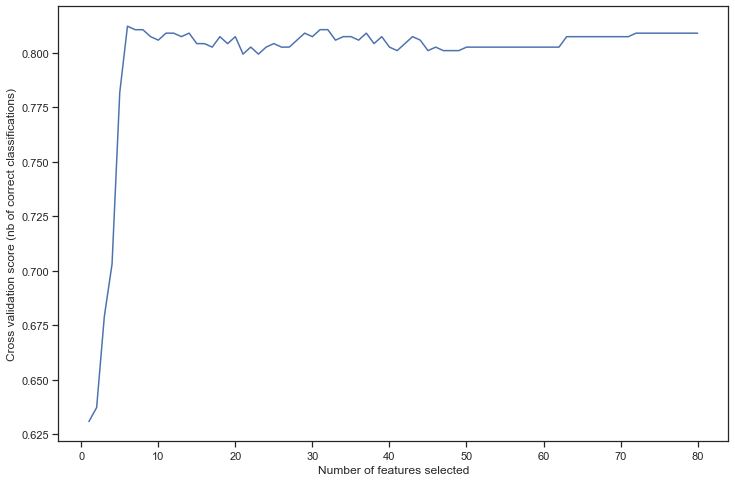

In [171]:
pyplot_options(12, 8)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### Feature Importance

In [172]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)

In [182]:
importances = pd.DataFrame({'Features':X_train.columns, 'Importance':clf.feature_importances_})
importances.sort_values(by='Importance', ascending=False).head(10)

,Features,Importance
2,Fare,0.129016
1,Age,0.104671
0,Sex,0.100185
50,Title_Mr,0.096857
21,Pclass_3,0.040641
51,Title_Mrs,0.038881
4,Youth,0.033214
64,NewCabin_X,0.021679
38,Embarked_S,0.020201
47,Title_Miss,0.019605


#### Principal Component Analysis

In [230]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
fit = pca.fit(X_train)

In [231]:
print("Explained Variance: %s" % fit.explained_variance_ratio_)
#print(fit.components_)

Explained Variance: [0.9344935  0.06340565]


In [233]:
pd.DataFrame({'Components': np.arange(1, 3), 'Explanined Varianve': fit.explained_variance_ratio_})

,Components,Explanined Varianve
0,1,0.934493
1,2,0.063406


In [236]:
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

### Model I: Logistic Regression

In [192]:
X_train_new = X_train[feature_selection_array]
X_test_new = X_test[feature_selection_array]

In [238]:
X_train.columns

Index(['Sex', 'Age', 'Fare', 'NormalTitle', 'Youth', 'PassengerTicketGT2',
       'PassengerCabinGT2', 'NewParch', 'FareBins_0', 'FareBins_10',
       'FareBins_25', 'FareBins_50', 'FareBins_75', 'AgeBins_0', 'AgeBins_6',
       'AgeBins_20', 'AgeBins_30', 'AgeBins_45', 'AgeBins_60', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Capt', 'Title_Col', 'Title_Don', 'Title_Dr',
       'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Master',
       'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs',
       'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess',
       'NewCabin_A', 'NewCabin_B', 'NewCabin_C', 'NewCabin_D', 'NewCabin_E',
       'NewCabin_F', 'NewCabin_G', 'NewCabin_T', 'NewCabin_X',
       'PassengerCabin_0.0', 'PassengerCabin_1.0', 'P

In [244]:
my_features = np.array(['Sex', "AgeBins_0", "AgeBins_6", "AgeBins_20", "AgeBins_30", "AgeBins_45", "AgeBins_60", "Pclass_3", "Parch_0", "PassengerCabinGT2", 
                        "PassengerTicketGT2", "SibSp_0", 'SibSp_1'])
X_train_my = X_train[my_features]
X_test_my = X_test[my_features]

In [264]:
my_features2 = np.array(['Sex', 'Parch_4', 'Parch_5', 'SibSp_0_>2', 'Title_Master', 'NewCabin_E', 'Fare', 'Youth', "AgeBins_0", "AgeBins_6", "AgeBins_20", "AgeBins_30", "AgeBins_45", "AgeBins_60"])
X_train_my2 = X_train[my_features]
X_test_my2 = X_test[my_features]

In [250]:
X_train_new.columns

Index(['Sex', 'Parch_4', 'Parch_5', 'Title_Master', 'NewCabin_E',
       'SibSp_0_>2'],
      dtype='object')

In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

def logistic_regression_grid_search(X_train, X_test, y_train, y_test):

    grid_param = [
        {'C' : range(0, 11, 1),
        'fit_intercept' : [True, False],
        'penalty' : ['l2'],
        'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
        'class_weight' : ['balanced']},
        {'C' : range(0, 11, 1),
        'fit_intercept' : [True, False],
        'penalty' : ['l1'],
        'solver' : ['liblinear'],
        'class_weight' : ['balanced']},
        {'C' : range(0, 11, 1),
        'fit_intercept' : [True, False],
        'penalty' : ['elasticnet'],
        'solver' : ['saga'],
        'class_weight' : ['balanced'],
        'l1_ratio' : [0.1, 0.3, 0.5, 0.7]}]

    scores = ['accuracy', 'precision', 'recall']
    best_params = []

    for score in scores:
        model_logistic = LogisticRegression()
        model_logistic_gs = GridSearchCV(estimator=model_logistic, param_grid=grid_param, cv=5, scoring=score)
        model_logistic_gs.fit(X_train, y_train)
        print("Score: %s" % score)
        print("Best parameters:", model_logistic_gs.best_params_)
        print()
        print("Training score: %s" % model_logistic_gs.score(X_train, y_train))
        print("Testing score: %s" % model_logistic_gs.score(X_test, y_test))
        best_params = np.append(best_params, model_logistic_gs.best_params_)
    return best_params
    

In [195]:
best_params_lr_new = logistic_regression_grid_search(X_train_new, X_test_new, y_train, y_test)

Score: accuracy
Best parameters: {'C': 5, 'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}

Training score: 0.826645264847512
Testing score: 0.832089552238806
Score: precision
Best parameters: {'C': 1, 'class_weight': 'balanced', 'fit_intercept': False, 'penalty': 'l2', 'solver': 'newton-cg'}

Training score: 0.868421052631579
Testing score: 0.8
Score: recall
Best parameters: {'C': 1, 'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}

Training score: 0.7445887445887446
Testing score: 0.7747747747747747


In [196]:
best_params_lr_my = logistic_regression_grid_search(X_train_my, X_test_my, y_train, y_test)

Score: accuracy
Best parameters: {'C': 2, 'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}

Training score: 0.812199036918138
Testing score: 0.835820895522388
Score: precision
Best parameters: {'C': 2, 'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}

Training score: 0.7522123893805309
Testing score: 0.8130841121495327
Score: recall
Best parameters: {'C': 4, 'class_weight': 'balanced', 'fit_intercept': False, 'penalty': 'l2', 'solver': 'newton-cg'}

Training score: 0.7359307359307359
Testing score: 0.7837837837837838


In [261]:
best_params_lr_my2 = logistic_regression_grid_search(X_train_my2, X_test_my2, y_train, y_test)

Score: accuracy
Best parameters: {'C': 9, 'class_weight': 'balanced', 'fit_intercept': False, 'penalty': 'l2', 'solver': 'newton-cg'}

Training score: 0.8282504012841091
Testing score: 0.8246268656716418
Score: precision
Best parameters: {'C': 9, 'class_weight': 'balanced', 'fit_intercept': False, 'penalty': 'l2', 'solver': 'newton-cg'}

Training score: 0.7719298245614035
Testing score: 0.7962962962962963
Score: recall
Best parameters: {'C': 1, 'class_weight': 'balanced', 'fit_intercept': False, 'l1_ratio': 0.1, 'penalty': 'elasticnet', 'solver': 'saga'}

Training score: 0.9090909090909091
Testing score: 0.9369369369369369


In [241]:
best_params_lr_pca = logistic_regression_grid_search(X_pca_train, X_pca_test, y_train, y_test)

Score: accuracy
Best parameters: {'C': 1, 'class_weight': 'balanced', 'fit_intercept': False, 'penalty': 'l2', 'solver': 'newton-cg'}

Training score: 0.6853932584269663
Testing score: 0.6940298507462687
Score: precision
Best parameters: {'C': 1, 'class_weight': 'balanced', 'fit_intercept': False, 'penalty': 'l2', 'solver': 'newton-cg'}

Training score: 0.5935828877005348
Testing score: 0.6883116883116883
Score: recall
Best parameters: {'C': 1, 'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}

Training score: 0.48917748917748916
Testing score: 0.5045045045045045


In [201]:
# Save Results
import pickle

filename1 = "logistic_reg_new_20200612.sav"
filename2 = "logistic_reg_my_20200612.sav"

pickle.dump(best_params_lr_new, open(filename1, 'wb'))
pickle.dump(best_params_lr_my, open(filename2, 'wb'))

### Model II: Random Forest

In [199]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_grid_search(X_train, X_test, y_train, y_test):
    grid_param = [
        {'n_estimators' : range(10, 110, 10),
        'criterion' : ['gini', 'entropy'],
        'min_samples_split' : [0.005, 0.01, 0.02, 0.05, 0.1, 0.2],
        'min_samples_split' : [0.005, 0.01, 0.02, 0.05, 0.1, 0.2],
        'bootstrap' : [True, False],
        'random_state' : [123],
        'class_weight' : ['balanced', 'balanced_subsample']}]

    scores = ['accuracy']#, 'precision', 'recall']
    best_params = []

    for score in scores:
        random_forest_model = RandomForestClassifier()
        random_forest_model_gs = GridSearchCV(estimator=random_forest_model, param_grid=grid_param, cv=5, scoring=score)
        random_forest_model_gs.fit(X_train, y_train)
        print("Score: %s" % score)
        print("Best parameters:", random_forest_model_gs.best_params_)
        print()
        print("Training score: %s" % random_forest_model_gs.score(X_train, y_train))
        print("Testing score: %s" % random_forest_model_gs.score(X_test, y_test))
        best_params = np.append(best_params, random_forest_model_gs.best_params_)
    return best_params



In [200]:
best_params_rf_new = random_forest_grid_search(X_train_new, X_test_new, y_train, y_test)

Score: accuracy
Best parameters: {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'min_samples_split': 0.05, 'n_estimators': 20, 'random_state': 123}

Training score: 0.826645264847512
Testing score: 0.832089552238806


In [202]:
best_params_rf_my = random_forest_grid_search(X_train_my, X_test_my, y_train, y_test)

Score: accuracy
Best parameters: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'min_samples_split': 0.005, 'n_estimators': 20, 'random_state': 123}

Training score: 0.8426966292134831
Testing score: 0.8208955223880597


In [203]:
filename1 = "random_forest_new_20200612.sav"
filename2 = "random_forest_my_20200612.sav"

pickle.dump(best_params_rf_new, open(filename1, 'wb'))
pickle.dump(best_params_rf_my, open(filename2, 'wb'))

### Model III: AdaBoost

In [204]:
from sklearn.ensemble import AdaBoostClassifier
import time as t

def adaboost_grid_search(X_train, X_test, y_train, y_test):
    grid_param = [
        {'n_estimators' : range(10, 110, 10),
        'learning_rate' : [ 0.01, 0.05, 0.1],
        'algorithm' : ['SAMME', 'SAMME.R']}]

    scores = ['accuracy', 'precision', 'recall']
    best_params = []
    start = t.time()
    
    for score in scores:
        adaboost_model = AdaBoostClassifier()
        adaboost_model_gs = GridSearchCV(estimator=adaboost_model, param_grid=grid_param, cv=5, scoring=score)
        adaboost_model_gs.fit(X_train, y_train)
        print("Score: %s" % score)
        print("Best parameters:", adaboost_model_gs.best_params_)
        print()
        print("Training score: %s" % adaboost_model_gs.score(X_train, y_train))
        print("Testing score: %s" % adaboost_model_gs.score(X_test, y_test))
        print()
        best_params = np.append(best_params, adaboost_model_gs.best_params_)
    end = t.time() - start
    print("Evaluation time: %s" % end)
    return best_params


In [205]:
best_params_ab_new = adaboost_grid_search(X_train_new, X_test_new, y_train, y_test)

Score: accuracy
Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}

Training score: 0.826645264847512
Testing score: 0.832089552238806

Score: precision
Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}

Training score: 0.7782805429864253
Testing score: 0.8173076923076923

Score: recall
Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}

Training score: 0.7445887445887446
Testing score: 0.7657657657657657

Evaluation time: 85.71195363998413


In [206]:
best_params_ab_my = adaboost_grid_search(X_train_my, X_test_my, y_train, y_test)

Score: accuracy
Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}

Training score: 0.797752808988764
Testing score: 0.7985074626865671

Score: precision
Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}

Training score: 0.7375565610859729
Testing score: 0.7766990291262136

Score: recall
Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 60}

Training score: 0.7056277056277056
Testing score: 0.7207207207207207

Evaluation time: 87.92478489875793


In [207]:
filename1 = "adaboost_new_20200612.sav"
filename2 = "adaboost_my_20200612.sav"

pickle.dump(best_params_ab_new, open(filename1, 'wb'))
pickle.dump(best_params_ab_my, open(filename2, 'wb'))

### Model IV: Gradient Boosting

In [208]:
from sklearn.ensemble import GradientBoostingClassifier
import time as t

def gradient_boosting_grid_search(X_train, X_test, y_train, y_test):
    grid_param = [
        {'n_estimators' : range(10, 110, 10),
        'learning_rate' : [ 0.01, 0.05, 0.1]}]

    scores = ['accuracy', 'precision', 'recall']
    best_params = []
    start = t.time()
    
    for score in scores:
        gradient_boosting_model = GradientBoostingClassifier()
        gradient_boosting_model_gs = GridSearchCV(estimator=gradient_boosting_model, param_grid=grid_param, cv=5, scoring=score)
        gradient_boosting_model_gs.fit(X_train, y_train)
        print("Score: %s" % score)
        print("Best parameters:", gradient_boosting_model_gs.best_params_)
        print()
        print("Training score: %s" % gradient_boosting_model_gs.score(X_train, y_train))
        print("Testing score: %s" % gradient_boosting_model_gs.score(X_test, y_test))
        print()
        best_params = np.append(best_params, gradient_boosting_model_gs.best_params_)
    end = t.time() - start
    print("Evaluation time: %s" % end)
    return best_params

In [211]:
best_params_gb_new = gradient_boosting_grid_search(X_train_new, X_test_new, y_train, y_test)

Score: accuracy
Best parameters: {'learning_rate': 0.01, 'n_estimators': 50}

Training score: 0.8234349919743178
Testing score: 0.832089552238806

Score: precision
Best parameters: {'learning_rate': 0.01, 'n_estimators': 30}

Training score: 1.0
Testing score: 1.0

Score: recall
Best parameters: {'learning_rate': 0.05, 'n_estimators': 30}

Training score: 0.7445887445887446
Testing score: 0.7657657657657657

Evaluation time: 19.68588614463806


In [212]:
best_params_gb_my = gradient_boosting_grid_search(X_train_my, X_test_my, y_train, y_test)

Score: accuracy
Best parameters: {'learning_rate': 0.1, 'n_estimators': 90}

Training score: 0.8459069020866774
Testing score: 0.832089552238806

Score: precision
Best parameters: {'learning_rate': 0.01, 'n_estimators': 50}

Training score: 0.9669421487603306
Testing score: 0.9193548387096774

Score: recall
Best parameters: {'learning_rate': 0.1, 'n_estimators': 90}

Training score: 0.696969696969697
Testing score: 0.7027027027027027

Evaluation time: 21.507022619247437


In [213]:
filename1 = "gradboost_new_20200612.sav"
filename2 = "gradboost_my_20200612.sav"

pickle.dump(best_params_gb_new, open(filename1, 'wb'))
pickle.dump(best_params_gb_my, open(filename2, 'wb'))

### Model V: XGBoost

In [214]:
from xgboost import XGBClassifier

def xgboosting_grid_search(X_train, X_test, y_train, y_test):
    grid_param = [
        {'n_estimators' : range(10, 110, 10),
        'learning_rate' : [ 0.01, 0.05, 0.1],
        'booster': ['gbtree', 'gblinear', 'dart'],
        'max_depth':[4,6,8,10,12],
        'min_child_weight':[4,5,6],
        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5]}]

    scores = ['accuracy']#, 'precision', 'recall']
    best_params = []
    start = t.time()
    
    for score in scores:
        xgb_model = XGBClassifier()
        xgb_model_gs = GridSearchCV(estimator=xgb_model, param_grid=grid_param, cv=5, scoring=score)
        xgb_model_gs.fit(X_train, y_train)
        print("Score: %s" % score)
        print("Best parameters:", xgb_model_gs.best_params_)
        print()
        print("Training score: %s" % xgb_model_gs.score(X_train, y_train))
        print("Testing score: %s" % xgb_model_gs.score(X_test, y_test))
        print()
        best_params = np.append(best_params, xgb_model_gs.best_params_)
    end = t.time() - start
    print("Evaluation time: %s" % end)
    return best_params

In [215]:
best_params_xgb_new = xgboosting_grid_search(X_train_new, X_test_new, y_train, y_test)

Score: accuracy
Best parameters: {'booster': 'gbtree', 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 80}

Training score: 0.8202247191011236
Testing score: 0.832089552238806

Evaluation time: 669.9940187931061


In [216]:
best_params_xgb_my = xgboosting_grid_search(X_train_my, X_test_my, y_train, y_test)

Score: accuracy
Best parameters: {'booster': 'gbtree', 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 50}

Training score: 0.8282504012841091
Testing score: 0.8246268656716418

Evaluation time: 1453.9606852531433


In [217]:
filename1 = "xgb_new_20200612.sav"
filename2 = "xgb_my_20200612.sav"

pickle.dump(best_params_xgb_new, open(filename1, 'wb'))
pickle.dump(best_params_xgb_my, open(filename2, 'wb'))

## Submission

In [326]:
X_new = X[feature_selection_array]
df_test_new = df_test[feature_selection_array]

In [317]:
X_my2 = X[my_features2]

### Parameters

In [318]:
lr_params = {'C': 5, 'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}
lr_params2 = {'C': 1, 'class_weight': 'balanced', 'fit_intercept': False, 'l1_ratio': 0.1, 'penalty': 'elasticnet', 'solver': 'saga'}
rf_params = {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'min_samples_split': 0.05, 'n_estimators': 20, 'random_state': 123}
ab_params = {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}
gb_params = {'learning_rate': 0.01, 'n_estimators': 50}
xgb_params = {'booster': 'gbtree', 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 50}

### Model Evaluation

In [263]:
model_lr = LogisticRegression(**lr_params)
model_lr2 = LogisticRegression(**lr_params2)
model_rf = RandomForestClassifier(**rf_params)
model_ab = AdaBoostClassifier(**ab_params)
model_gb = GradientBoostingClassifier(**gb_params)
model_xgb = XGBClassifier(**xgb_params)

In [327]:
model_lr.fit(X_new, y)
model_lr.score(X_new, y)

0.8282828282828283

In [273]:
model_lr.fit(X_my2, y)
model_lr.score(X_my2, y)

0.8282828282828283

In [328]:
model_rf.fit(X_new, y)
model_rf.score(X_new, y)

0.8282828282828283

In [223]:
model_ab.fit(X_new, y)
model_ab.score(X_new, y)

0.8237934904601572

In [224]:
model_gb.fit(X_new, y)
model_gb.score(X_new, y)

0.8260381593714927

In [225]:
model_xgb.fit(X_new, y)
model_xgb.score(X_new, y)

0.8237934904601572

### Submission

In [329]:
df_sub_lr = model_lr.predict(df_test_new)
df_sub_rf = model_rf.predict(df_test_new)

In [333]:
df_sub_lr_model=pd.DataFrame({'PassengerId':df_test.PassengerId, 'Survived':df_sub_lr})
df_sub_rf_model=pd.DataFrame({'PassengerId':df_test.PassengerId, 'Survived':df_sub_rf})

In [334]:
df_sub_lr_model.to_csv("../data/df_sub_lr_20200612.csv", columns = ("PassengerId", "Survived"), index=False)
df_sub_rf_model.to_csv("../data/df_sub_rf_20200612.csv", columns = ("PassengerId", "Survived"), index=False)